In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
print(f"X shape: {X.shape}")

X shape: (307, 2)


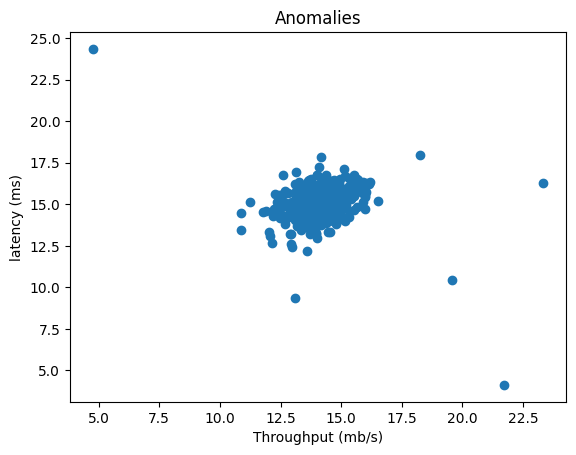

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title("Anomalies")
plt.xlabel("Throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.show()

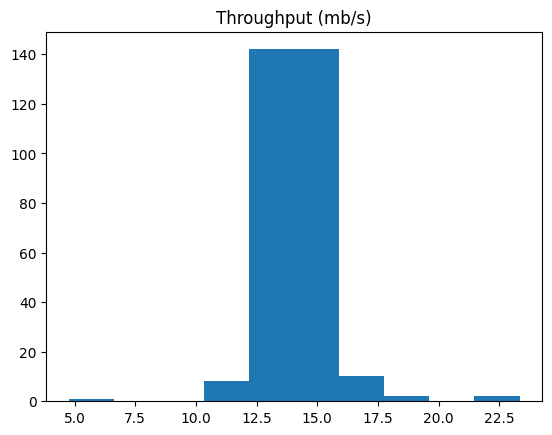

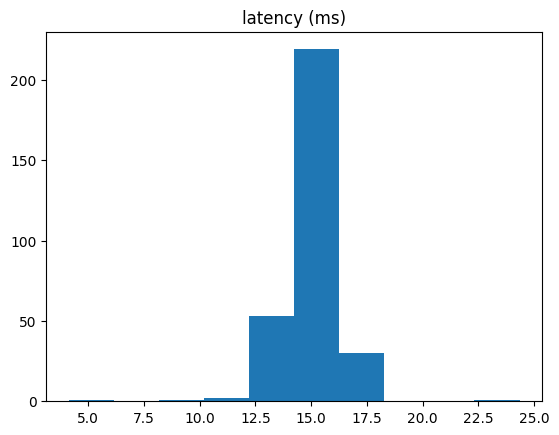

In [4]:
plt.hist(X[:,0])
plt.title("Throughput (mb/s)")
plt.show()

plt.hist(X[:,1])
plt.title("latency (ms)")
plt.show()

#### Gaussian distribution

In [5]:
def estimate_gaussian(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    return mu, sigma

mu, sigma = estimate_gaussian(X)
print(f"mu: {mu},\n sigma: {sigma}")

mu: [14.11222578 14.99771051],
 sigma: [1.35374717 1.3075723 ]


#### Propability

In [6]:
Xval = data['Xval']
yval = data['yval']
from scipy import stats

In [7]:
pdf_norm = stats.norm.pdf(X[:50, :], loc=mu, scale=sigma)
pdf_norm

array([[0.21620977, 0.29928475],
       [0.25745208, 0.19539236],
       [0.29413223, 0.24631896],
       [0.24721192, 0.20353285],
       [0.27251547, 0.23369303],
       [0.2918119 , 0.14549894],
       [0.18713958, 0.25600918],
       [0.15117648, 0.24151341],
       [0.09356331, 0.19949913],
       [0.166609  , 0.30423483],
       [0.29338708, 0.09037578],
       [0.29448769, 0.28766234],
       [0.25559237, 0.27797121],
       [0.25595621, 0.27173864],
       [0.2932714 , 0.12881868],
       [0.2944456 , 0.28087687],
       [0.29288017, 0.29975441],
       [0.28518331, 0.3046332 ],
       [0.27727759, 0.24946431],
       [0.09489765, 0.10258106],
       [0.27027271, 0.28011206],
       [0.29342161, 0.30119392],
       [0.24110555, 0.15516046],
       [0.29304288, 0.29735436],
       [0.19607729, 0.21044271],
       [0.15652979, 0.15894753],
       [0.27590459, 0.28665754],
       [0.25749622, 0.29485051],
       [0.27667047, 0.2921371 ],
       [0.2834953 , 0.27033816],
       [0.

In [8]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=mu[0], scale=sigma[0])
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=mu[1], scale=sigma[1])
pval

array([[1.36688038e-01, 3.04577250e-01],
       [2.77272653e-01, 2.95409626e-01],
       [2.52387437e-01, 1.61322525e-01],
       [2.73146659e-01, 2.26618293e-01],
       [2.62778656e-01, 2.70900066e-01],
       [2.03711020e-01, 2.08307264e-01],
       [1.99132113e-01, 3.02316122e-01],
       [2.91026337e-01, 2.88751221e-01],
       [7.95117869e-02, 2.65241551e-01],
       [2.53066098e-01, 3.04262360e-01],
       [2.76941891e-01, 2.88628756e-01],
       [1.40516190e-01, 3.03463058e-01],
       [2.10596140e-01, 2.51500509e-01],
       [9.82402034e-02, 1.48224691e-01],
       [2.58184982e-01, 2.10447722e-01],
       [1.92526120e-01, 2.28745285e-01],
       [1.74868919e-01, 2.49576082e-01],
       [1.89375290e-01, 3.01093208e-01],
       [2.87820926e-01, 2.64545790e-01],
       [1.90228719e-01, 2.40171433e-01],
       [2.94694820e-01, 2.96185719e-01],
       [1.87405774e-01, 1.86052711e-01],
       [2.77364496e-01, 3.05101425e-01],
       [2.92025832e-01, 2.47138329e-01],
       [2.670440

#### Selecting the threshhold

In [9]:
from sklearn.metrics import f1_score
from operator import or_
def select_threshold(pval, yval):
    threshold_vector = np.linspace(pval.min(), pval.max(), 10000)
    best_epsilon = 0
    best_f1 = 0
    for thresh in threshold_vector:
        ypred = np.logical_or(pval[:,0] < thresh,  pval[:,1] < thresh)
        current_f1 = f1_score(yval, ypred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_epsilon = thresh
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
print(f"eps: {best_epsilon}, f1: {best_f1}")

eps: 0.0003966715195093453, f1: 0.8750000000000001


#### Anomaly detection result

In [10]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))

y = np.where(np.logical_or(p[:,0] < best_epsilon,  p[:,1] < best_epsilon))
anomalies = [X[i] for i in y][0]
print(anomalies, y)

[[13.07931049  9.34787812]
 [21.72713402  4.12623222]
 [19.58257277 10.411619  ]
 [23.33986753 16.29887355]
 [ 4.75261282 24.35040725]] (array([300, 301, 303, 304, 306], dtype=int64),)


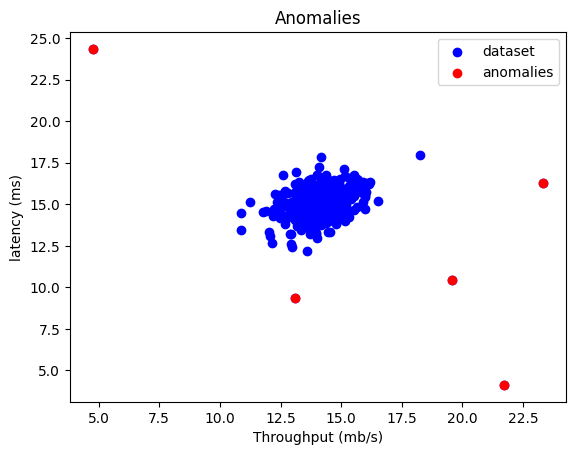

In [11]:
plt.scatter(X[:,0], X[:,1], color='blue', label="dataset")
plt.scatter(anomalies[:,0], anomalies[:,1], color='red', label='anomalies')
plt.title("Anomalies")
plt.xlabel("Throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.legend()
plt.show()